In [1]:
## check availability of GPU (nvidia-smi)
import os
os.environ["CUDA_VISIBLE_DEVICES"]="3"

In [2]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla V100-SXM2-32GB, compute capability 7.0


In [3]:
import warnings
warnings.filterwarnings("ignore")

import os 
import glob

current_dir = "/mnt/akoustos/"

data_dir = current_dir + "Data/"
labeled_data_dir = data_dir + 'Labeled_Data/'
audio_dir = data_dir + "Raw_Audio/"

spectrogram_dir = data_dir + "Extracted_Spectrogram/"
if not os.path.exists(spectrogram_dir):
    os.makedirs(spectrogram_dir)


In [4]:
from src.data_split import Data_Split
categories = ['25', '14', '4949']  ## regard the remaining labeled detections with other labels as "non-category" (i.e., negatives)
data = Data_Split.data_split(categories, spectrogram_dir, include_no_label_category = True)
print(data.head(10))

   label  Count  Percentage
0  -9999   1247       45.38
1     14    500       18.20
2     25    500       18.20
3   4949    501       18.23
Size of train, val, test dataset: 1922 413 413
Percentage of train, val, test dataset: 69.9% 15.0% 15.0%
                                            filename  label  split
0  /mnt/akoustos/Data/Extracted_Spectrogram/proje...  -9999  train
1  /mnt/akoustos/Data/Extracted_Spectrogram/proje...  -9999  train
2  /mnt/akoustos/Data/Extracted_Spectrogram/proje...   4949    val
3  /mnt/akoustos/Data/Extracted_Spectrogram/proje...     25  train
4  /mnt/akoustos/Data/Extracted_Spectrogram/proje...     25   test
5  /mnt/akoustos/Data/Extracted_Spectrogram/proje...     25  train
6  /mnt/akoustos/Data/Extracted_Spectrogram/proje...  -9999   test
7  /mnt/akoustos/Data/Extracted_Spectrogram/proje...   4949  train
8  /mnt/akoustos/Data/Extracted_Spectrogram/proje...     25  train
9  /mnt/akoustos/Data/Extracted_Spectrogram/proje...  -9999    val


### Train with a Customized CNN 

Please choose one model from the available models: Customized_CNN, Resnet18, Resnet34, Resnet50, Resnet101, Resnet152, Alexnet, VGG11, VGG13, VGG16, VGG19, Densenet121, Densenet169, Densenet201, Squeezenet1_0.
Begin training.
Epoch 01: | Train Loss: 147.85609 | Val Loss: 33.17569 | Train Acc: 0.352| Val Acc: 0.433
Epoch 02: | Train Loss: 20.65863 | Val Loss: 4.84914 | Train Acc: 0.452| Val Acc: 0.492
Epoch 03: | Train Loss: 5.17708 | Val Loss: 3.12436 | Train Acc: 0.517| Val Acc: 0.642
Epoch 04: | Train Loss: 2.58730 | Val Loss: 1.59122 | Train Acc: 0.584| Val Acc: 0.627
Epoch 05: | Train Loss: 1.27731 | Val Loss: 1.25513 | Train Acc: 0.620| Val Acc: 0.659
Epoch 06: | Train Loss: 1.38174 | Val Loss: 0.90366 | Train Acc: 0.630| Val Acc: 0.627
Epoch 07: | Train Loss: 1.01540 | Val Loss: 0.78516 | Train Acc: 0.653| Val Acc: 0.717
Epoch 08: | Train Loss: 0.79290 | Val Loss: 0.83838 | Train Acc: 0.695| Val Acc: 0.695
Epoch 09: | Train Loss: 0.73906 | Val Loss: 0.66364 | Train Acc: 0.705| Va

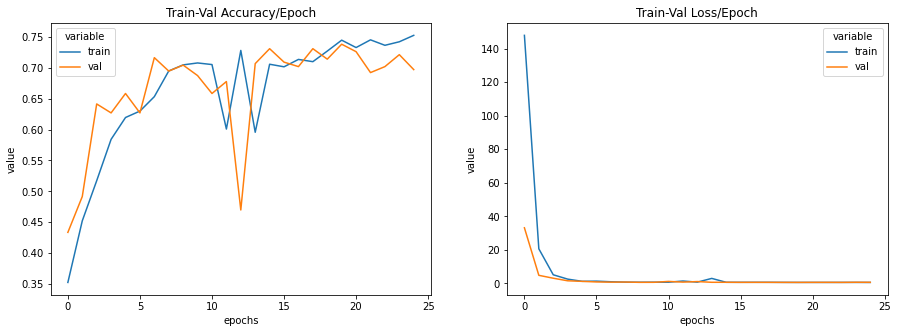

Scoring results on testset:
              precision    recall  f1-score   support

           0       0.75      0.70      0.72       189
           1       0.82      0.79      0.80        85
           2       0.73      0.80      0.77        71
           3       0.61      0.68      0.64        68

    accuracy                           0.73       413
   macro avg       0.73      0.74      0.73       413
weighted avg       0.74      0.73      0.73       413

Confusion matrix on testset:
             pred: -9999  pred: 14  pred: 25  pred: 4949
true: -9999          133        13        17          26
true: 14              14        67         2           2
true: 25              12         1        57           1
true: 4949            19         1         2          46


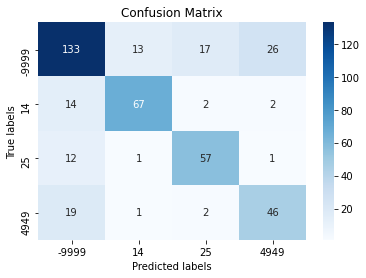

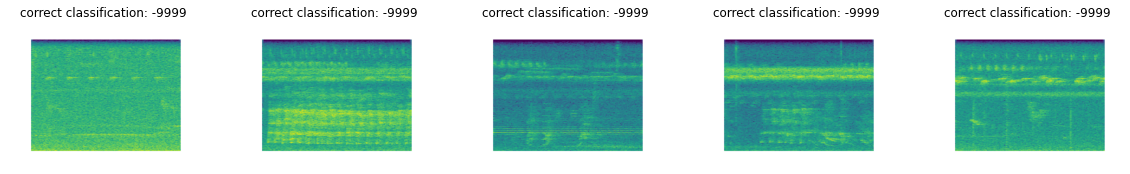

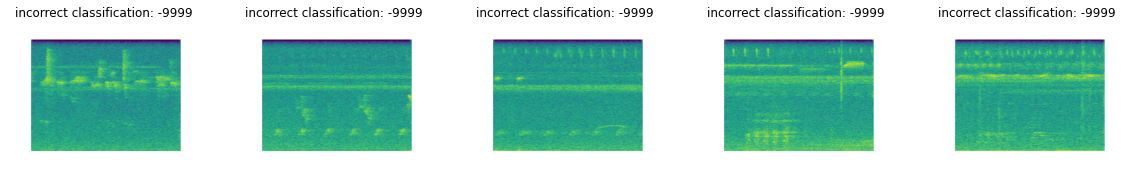

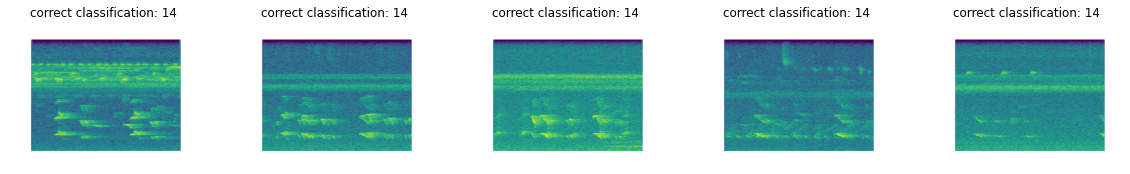

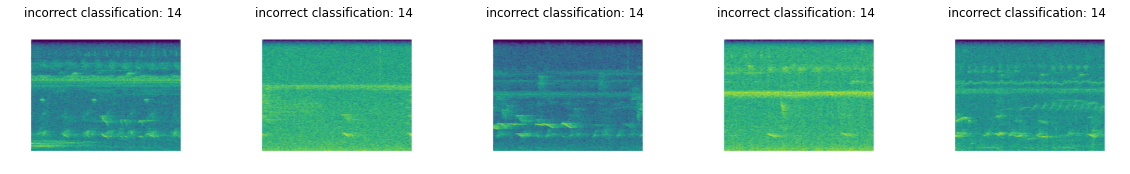

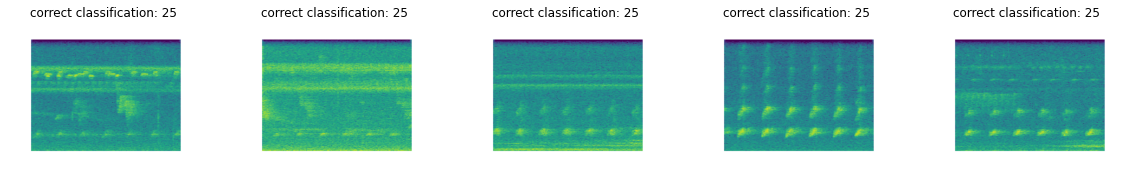

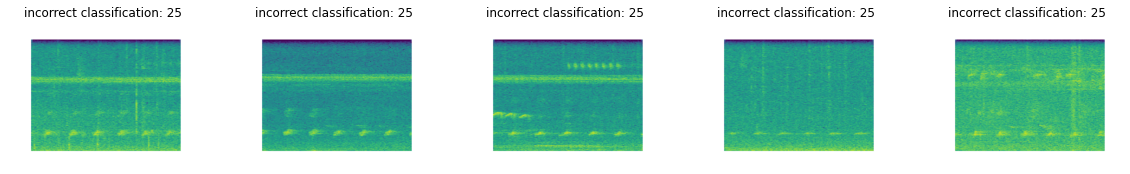

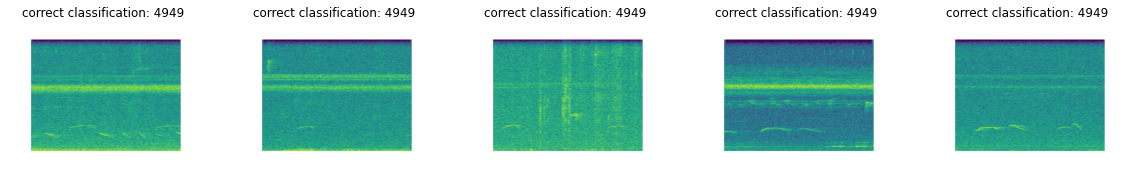

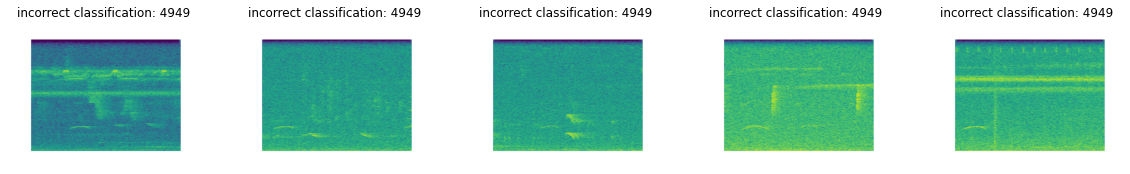

In [5]:
from src.model.multiclass_classification import multiclass_classification_models
model = multiclass_classification_models.train_model(data = data, 
                                                     model_name = 'Customized_CNN', 
                                                     batch_size = 32,  
                                                     optimizer = 'Adam', 
                                                     learning_rate = 0.008, 
                                                     lr_decay = False, 
                                                     num_epochs = 25)


### Fine-tune a pre-trained model

Please choose one model from the available models: Customized_CNN, Resnet18, Resnet34, Resnet50, Resnet101, Resnet152, Alexnet, VGG11, VGG13, VGG16, VGG19, Densenet121, Densenet169, Densenet201, Squeezenet1_0.
Begin training.
Epoch 01: | Train Loss: 1.55246 | Val Loss: 1.05011 | Train Acc: 0.771| Val Acc: 0.862
Epoch 02: | Train Loss: 0.78537 | Val Loss: 1.09953 | Train Acc: 0.861| Val Acc: 0.862
Epoch 03: | Train Loss: 0.74661 | Val Loss: 1.12497 | Train Acc: 0.855| Val Acc: 0.862
Epoch 04: | Train Loss: 0.76899 | Val Loss: 1.11168 | Train Acc: 0.853| Val Acc: 0.867
Epoch 05: | Train Loss: 0.78047 | Val Loss: 1.03835 | Train Acc: 0.862| Val Acc: 0.862
Epoch 06: | Train Loss: 0.72413 | Val Loss: 1.03149 | Train Acc: 0.867| Val Acc: 0.860
Epoch 07: | Train Loss: 0.81583 | Val Loss: 1.09788 | Train Acc: 0.847| Val Acc: 0.855
Epoch 08: | Train Loss: 0.75328 | Val Loss: 0.99805 | Train Acc: 0.862| Val Acc: 0.847
Epoch 09: | Train Loss: 0.83432 | Val Loss: 1.07660 | Train Acc: 0.843| Val Ac

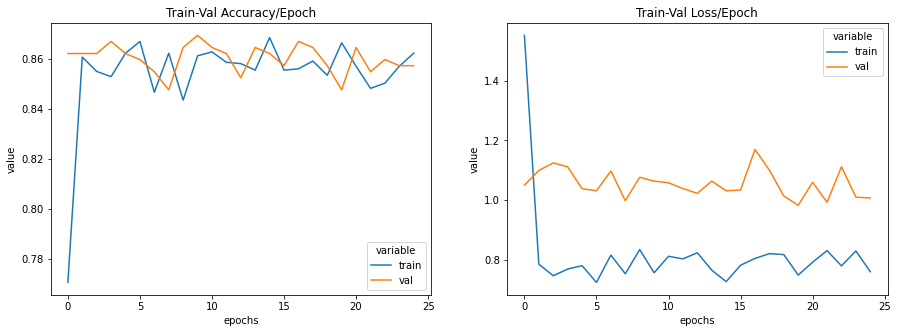

Scoring results on testset:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       189
           1       0.80      0.88      0.84        85
           2       0.83      0.97      0.90        71
           3       0.88      0.99      0.93        68

    accuracy                           0.88       413
   macro avg       0.87      0.91      0.88       413
weighted avg       0.89      0.88      0.88       413

Confusion matrix on testset:
             pred: -9999  pred: 14  pred: 25  pred: 4949
true: -9999          152        18        11           8
true: 14               6        75         3           1
true: 25               2         0        69           0
true: 4949             0         1         0          67


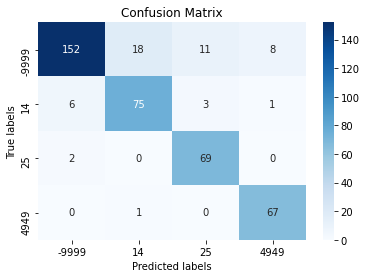

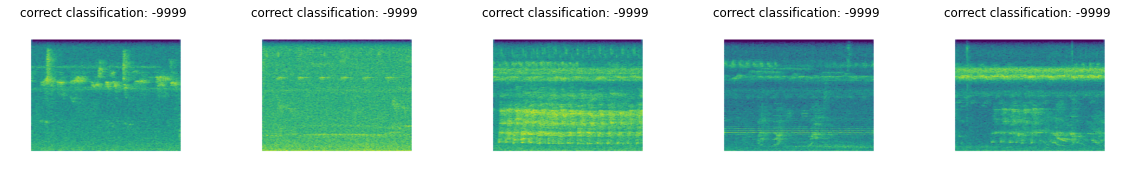

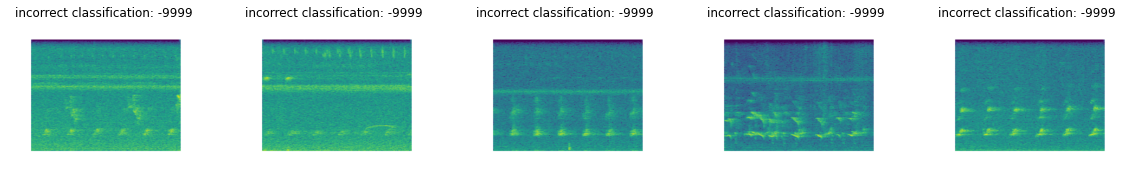

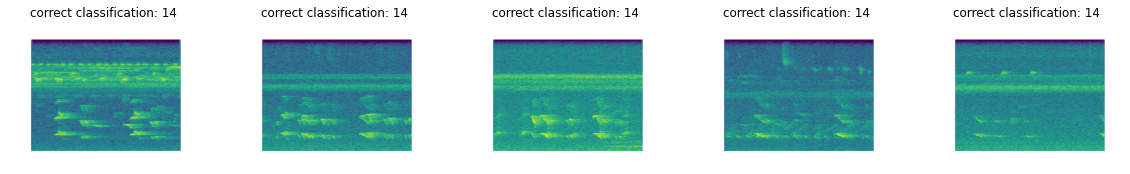

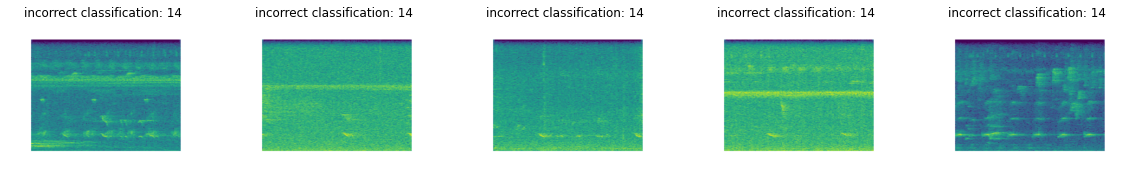

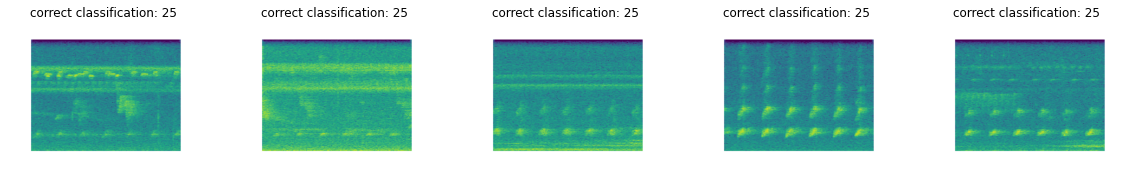

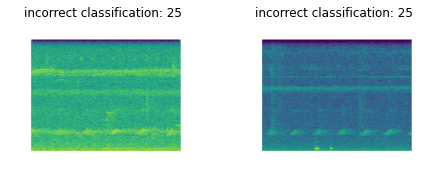

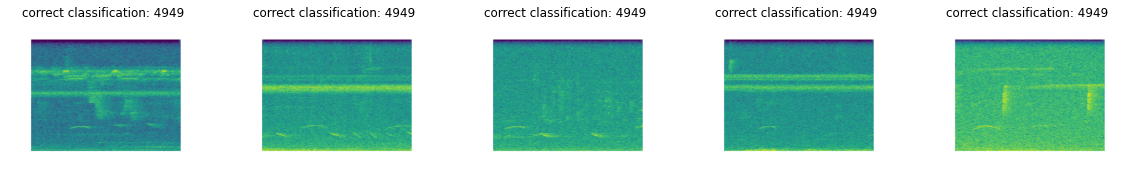

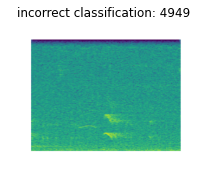

In [6]:
from src.model.multiclass_classification import multiclass_classification_models
model = multiclass_classification_models.train_model(data = data, 
                                                 model_name = 'Resnet18', 
                                                 batch_size = 32, 
                                                 pretrained = True, 
                                                 optimizer = 'Adam', 
                                                 learning_rate = 0.0005, 
                                                 lr_decay = True, 
                                                 num_epochs = 25)
